<a href="https://colab.research.google.com/github/Tecnologico-de-Monterrey-MNA/iayaa-Equipo-29/blob/main/SVD_Equipo29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 10**
###**Reducción de Dimensionalidad - Descomposición en Valores Singulares (SVD) y Sistemas de Recomendación**


**Nombres y matrículas de los integrantes del equipo:**

*   Eduardo Gabriel Arévalo Aguilar - A01793897
*   José Javier Granados Hernández - A00566717
*   Ernesto Enriquez Rubio - A01228409
*   Roberto Romero Vielma - A00822314  



En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [2013]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import TruncatedSVD

#**Ejercicio-1.** 
Descarga los archivos y genera la matriz de utilidad en la cual los renglones son los usuarios (user_ID), las columnas los nombres de los restaurantes (name) y las entradas la evaluaciones generales dadas por los usuarios (rating). En particular indica el tamaño de dicha matriz y despliega 
sus primeros 10 renglones. 

Importamos los datasets

In [2014]:
rating=pd.read_csv("https://raw.githubusercontent.com/rromerov/Machine-Learning-Projects/main/Datasets/rating_final.csv",encoding = "ISO-8859-1")
location=pd.read_csv("https://raw.githubusercontent.com/rromerov/Machine-Learning-Projects/main/Datasets/geoplaces2.csv",encoding = "ISO-8859-1")

Visualizamos las columnas del dataframe rating

In [2015]:
rating.columns

Index(['userID', 'placeID', 'rating', 'food_rating', 'service_rating'], dtype='object')

Guardamos en una lista, las columnas que nos interesan

In [2016]:
rating_columns=["userID","rating","placeID"]

Obtenemos ahora las columnas del dataset location

In [2017]:
location.columns

Index(['placeID', 'latitude', 'longitude', 'the_geom_meter', 'name', 'address',
       'city', 'state', 'country', 'fax', 'zip', 'alcohol', 'smoking_area',
       'dress_code', 'accessibility', 'price', 'url', 'Rambience', 'franchise',
       'area', 'other_services'],
      dtype='object')

Creamos otra lista con las columnas que nos interesan del dataset columns

In [2018]:
location_columns=["placeID","name"]

Unimos los 2 datasets

In [2019]:
df=pd.merge(rating[rating_columns],location[location_columns],on="placeID")
df.head()

,userID,rating,placeID,name
0,U1077,2,135085,Tortas Locas Hipocampo
1,U1108,1,135085,Tortas Locas Hipocampo
2,U1081,1,135085,Tortas Locas Hipocampo
3,U1056,2,135085,Tortas Locas Hipocampo
4,U1134,2,135085,Tortas Locas Hipocampo


Eliminamos la U dentro de la columna **userID**

In [2020]:
df["userID"] = df["userID"].apply(lambda x:int(str(x)[1::]))
df.head()

,userID,rating,placeID,name
0,1077,2,135085,Tortas Locas Hipocampo
1,1108,1,135085,Tortas Locas Hipocampo
2,1081,1,135085,Tortas Locas Hipocampo
3,1056,2,135085,Tortas Locas Hipocampo
4,1134,2,135085,Tortas Locas Hipocampo


Agrupamos los restaurantes por el rating

In [2021]:
df.groupby('name').count().sort_values(by='rating', ascending=False)

,userID,rating,placeID
name,,,
Tortas Locas Hipocampo,36,36,36
puesto de tacos,32,32,32
Cafeteria y Restaurant El Pacifico,28,28,28
La Cantina Restaurante,25,25,25
Gorditas Doa Gloria,25,25,25
...,...,...,...
Los Vikingos,3,3,3
Mikasa,3,3,3
Rincon del Bife,3,3,3


Mostramos los datos de Subway en base al rating

In [2022]:
_ = df.groupby('name').count().sort_values(by='rating').copy()
_[_.index == 'Subway']

,userID,rating,placeID
name,,,
Subway,9,9,9


Mostramos la gráfica

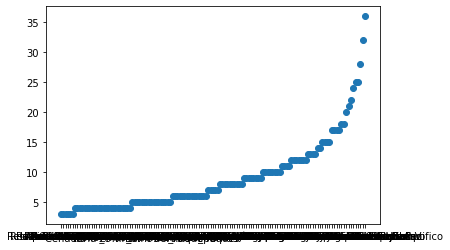

In [2023]:
plt.scatter(_.index, _.rating)

Creamos la matriz de utilidad

In [2024]:
UtMx = df.pivot_table(values='rating', index='userID', columns='name', fill_value=0)

Mostramos el tamaño de la matriz de utilidad

In [2025]:
UtMx.shape

(138, 129)

138 filas y 129 columnas

Desplegamos los primeros 10 renglones

In [2026]:
UtMx.head(10)

name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El RincÃ³n de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
1001,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
1003,0,0,2,0,0,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1005,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1006,0,0,0,1,0,0,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
1007,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1008,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1009,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


Obtenemos la correlación

In [2027]:
corr = UtMx.corr()

Visualizamos la información de la matriz de la utilidad

In [2028]:
print('Total de elementos de la matriz de utilidad: %d' % (UtMx.size))
print('Total de elementos diferentes de cero: %d' % (np.count_nonzero(UtMx)))
print('Porcentaje de elementos diferentes de cero: %.1f%%' % (100 * np.count_nonzero(UtMx) / UtMx.size))

Total de elementos de la matriz de utilidad: 17802
Total de elementos diferentes de cero: 907
Porcentaje de elementos diferentes de cero: 5.1%


Mostramos el tamaño de la matriz de utilidad

In [2029]:
UtMx.shape

(138, 129)

Obtenemos las correlaciones de los restaurantes con Subway

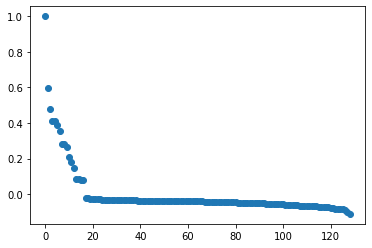

In [2030]:
corr_x = corr[corr.index== 'Subway'].T.sort_values(by='Subway', ascending=False)['Subway']
plt.scatter(range(len(corr_x)), corr_x)

#**Ejercicio-2.**
Con el objetivo de obtener la información con respecto a los vectores latentes de los restaurantes, 
obtener dicha factorización SVD utilizando todas las componentes posibles, es decir, usando todos 
sus valores singulares. En particular indica la cantidad de valores singulares obtenidos. 

In [2031]:
X = UtMx.T 
X.shape

(129, 138)

Para determinar la cantidad de vectores singulares necesarios para obtener el 90% de la información.

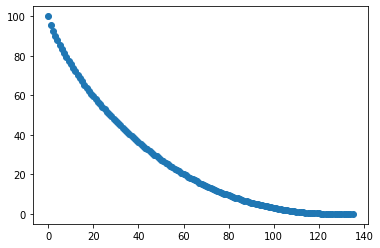

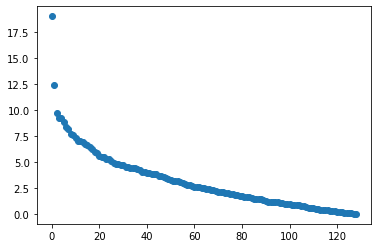

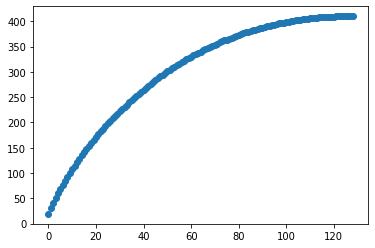

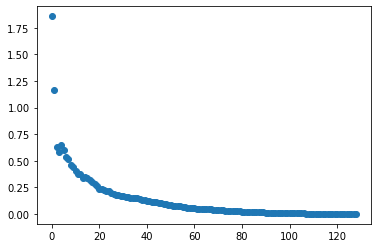

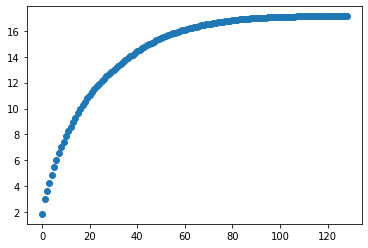

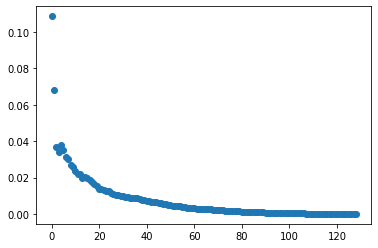

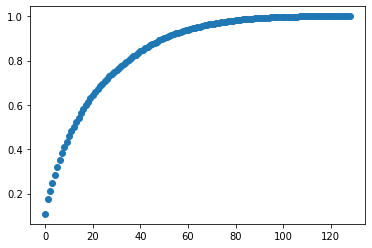

In [2032]:
import matplotlib.pyplot as plt
SVD = TruncatedSVD(n_components=137, random_state=1)  
SVD.fit(X)
cantidadList = []
for i in range(136):
  num_sv = i  
  cantidad = (100 * (1- (SVD.singular_values_[0:num_sv]).sum() / (SVD.singular_values_).sum()))
  cantidadList.append(cantidad)
plt.scatter(range(136), cantidadList)
plt.show()
roll1 = np.cumsum(SVD.singular_values_)
plt.scatter(range(len(SVD.singular_values_)), SVD.singular_values_)
plt.show()
plt.scatter(range(len(roll1)), roll1)
plt.show()
roll2 = np.cumsum(SVD.explained_variance_)
plt.scatter(range(len(SVD.explained_variance_)), SVD.explained_variance_)
plt.show()
plt.scatter(range(len(roll2)), roll2)
plt.show()
roll3 = np.cumsum(SVD.explained_variance_ratio_)
plt.scatter(range(len(SVD.explained_variance_ratio_)), SVD.explained_variance_ratio_)
plt.show()
plt.scatter(range(len(roll3)), roll3)
plt.show()

In [2033]:
SVD.singular_values_.ravel()

array([1.89824556e+01, 1.23895348e+01, 9.71004954e+00, 9.21987252e+00,
       9.19166417e+00, 8.83562133e+00, 8.35490731e+00, 8.16269046e+00,
       7.67589308e+00, 7.53252900e+00, 7.24693828e+00, 7.03772875e+00,
       6.96568920e+00, 6.94921261e+00, 6.72377310e+00, 6.62729356e+00,
       6.42888935e+00, 6.23122752e+00, 5.98488156e+00, 5.84593442e+00,
       5.52931996e+00, 5.45741148e+00, 5.43575015e+00, 5.30313453e+00,
       5.23195921e+00, 5.07778209e+00, 4.92772427e+00, 4.80719927e+00,
       4.77806009e+00, 4.72042746e+00, 4.68168774e+00, 4.48126959e+00,
       4.47285668e+00, 4.41292142e+00, 4.38371497e+00, 4.36866765e+00,
       4.34607925e+00, 4.19914184e+00, 4.07007621e+00, 4.04670751e+00,
       3.91390069e+00, 3.90244894e+00, 3.86052461e+00, 3.85945223e+00,
       3.79499753e+00, 3.62195823e+00, 3.62016459e+00, 3.50096878e+00,
       3.41779782e+00, 3.34322000e+00, 3.30294415e+00, 3.16880603e+00,
       3.14312670e+00, 3.11631317e+00, 3.07616268e+00, 2.95816128e+00,
      

Cantidad de valores singulares

In [2034]:
len(SVD.singular_values_.ravel())

129

#**Ejercicio-3.**
Usando la métrica de correlación de Pearson, obtener las 10 mejores recomendaciones de este modelo no supervisado con base a la información de alguien que evaluó bien de manera general al “Subway”. Despliega también el valor numérico de la correlación de Pearson de cada una de estas 10  recomendaciones. NOTA: No debe estar incluido “Subway” dentro de las recomendaciones. 

Visualizamos con cuanta información nos quedamos con 50 componentes

In [2035]:
num_sv = 50
list(map((float), SVD.explained_variance_ratio_))
totalComp = sum(SVD.explained_variance_ratio_)
partialcom = SVD.explained_variance_ratio_[0:num_sv].sum()
percent = partialcom/totalComp
percent * 100

89.60955947640585

Con ese valor generamos nuestra nueva matriz de tamaño ${m*n}$

Donde:

* ${m}$ es el número de filas

* ${n}$ es el número de columnas


In [2036]:
SVD = TruncatedSVD(n_components=num_sv, random_state=1)

resultant_matrix = SVD.fit_transform(X)
resultant_matrix.shape

(129, 50)

Obtenemos las correlaciones

In [2037]:
corrMx = np.corrcoef(resultant_matrix)
corrMx.shape

(129, 129)

Ponemos el restaurante del que queremos obtener las recomendaciones

In [2038]:
me_gusta = "Subway"

names = UtMx.columns
names_list = list(names)
id_megusta = names_list.index(me_gusta)

id_megusta

88

Obtenemos las correlaciones

In [2039]:
corr_recomienda = corrMx[id_megusta]
print(corr_recomienda.shape)
print(corr_recomienda)

(129,)
[ 2.04275924e-03  5.04138285e-02 -2.44059099e-02 -7.06637356e-03
 -6.77076138e-02 -6.12890394e-03 -1.34826627e-02 -1.03075860e-02
 -1.33641782e-04 -1.28468026e-02 -1.34283399e-02  3.50720890e-01
 -4.59089984e-03 -3.88519909e-03 -9.73212349e-03 -9.29493342e-03
 -1.72593947e-02  4.58528137e-03  3.54867356e-04 -1.72064600e-02
  5.71455912e-02  1.26878969e-01  8.99149407e-03  7.39674552e-03
 -1.74396001e-02 -8.75688348e-03  2.30199206e-02 -2.66113172e-02
 -3.67754201e-03  1.02177684e-01 -6.96835491e-03  2.81887510e-03
  1.13079201e-02 -7.63928251e-03  6.14079135e-03 -8.16950234e-03
 -5.47851868e-03  2.27471589e-01 -1.59445357e-02 -1.11846462e-03
 -3.05089822e-03  4.22484953e-01  1.52768582e-02  1.50028506e-02
  9.59741976e-04  4.92959198e-01  2.84344551e-01 -1.81653975e-02
 -1.49115153e-02 -5.09473540e-04 -7.95399300e-03  1.66952963e-01
 -1.26658074e-02 -1.47181620e-02  1.04315498e-01  2.18189461e-01
 -1.15910684e-03 -1.01977314e-02  8.20601259e-01 -4.22562862e-02
  6.08927954e-01 -

In [2040]:
corr_recomienda[id_megusta]

0.9999999999999998

Obtenemos los primeros 10 lugares que nos recomienda el modelo SVD

In [2041]:
restaurant_recomendations=pd.concat([pd.DataFrame(corr_recomienda),pd.DataFrame(names)],axis=1).sort_values(by=0,ascending=False).iloc[1:11:,:]
restaurant_recomendations

,0,name
58,0.820601,Restaurant Teely
85,0.701394,Rincon del Bife
60,0.608928,Restaurant and Bar and Clothesline Carlos N Ch...
97,0.592247,Vips
45,0.492959,Mikasa
86,0.481011,Sanborns Casa Piedra
41,0.422485,Mariscos Tia Licha
11,0.350721,Chilis Cuernavaca
64,0.293030,Restaurant los Pinos
46,0.284345,Paniroles


Visualizamos en la gráfica el índice del restaurante y la correlación que tiene con Subway

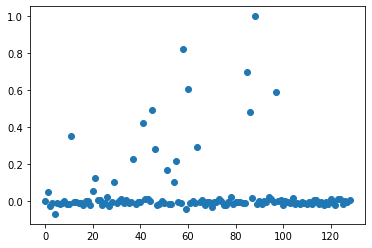

In [2042]:
plt.scatter(range(len(corr_recomienda)), corr_recomienda)

#**Ejercicio-4.**
Disminuye ahora la dimensión de la factorización con un número de componentes tal, que las recomendaciones con esta menor cantidad de información coincidan en al menos 9 de las 10 recomendaciones dadas con todos los valores singulares. Indica la cantidad de valores singulares encontrado y la cantidad de información que contienen. 

Creamos una función para obtener de manera más rápida las recomendaciones hechas por el modelo SVD, tomando como parámetros la cantidad de singular values (n), restaurantes, los nombres de las columnas de la matriz de utilidad

In [2043]:
def recomendation(n,restaurant,utility_Matrix_columns):
  SVD = TruncatedSVD(n_components=n, random_state=1)
  resultant_matrix = SVD.fit_transform(X)

  corrMx = np.corrcoef(resultant_matrix)
  me_gusta = restaurant

  names = utility_Matrix_columns
  names_list = list(names)
  id_megusta = names_list.index(me_gusta)
  corr_recomienda = corrMx[id_megusta]
  restaurant_recomendations=pd.concat([pd.DataFrame(corr_recomienda),pd.DataFrame(names)],axis=1).sort_values(by=0,ascending=False).iloc[1:11:,:]
  return restaurant_recomendations

Hacemos uso de la función para obtener las recomendaciones

In [2044]:
recomendation(30,"Subway",UtMx.columns)

,0,name
85,0.923897,Rincon del Bife
60,0.844907,Restaurant and Bar and Clothesline Carlos N Ch...
58,0.841589,Restaurant Teely
97,0.798651,Vips
37,0.748227,Log Yin
11,0.738333,Chilis Cuernavaca
86,0.695558,Sanborns Casa Piedra
45,0.585522,Mikasa
46,0.582720,Paniroles
41,0.561961,Mariscos Tia Licha


Definimos una función para obtener el porcentaje de información que queda, después de utilizar cierto n_component

In [2045]:
def information_quantity(n):
  num_sv = n
  list(map((float), SVD.explained_variance_ratio_))
  totalComp = sum(SVD.explained_variance_ratio_)
  partialcom = SVD.explained_variance_ratio_[0:num_sv].sum()
  percent = partialcom/totalComp
  return percent * 100

In [2046]:
information_quantity(30)

83.63321120970782

Con 30 singular values se obtienen 9 de 10 recomendaciones, con un 83% de la información original

#**Ejercicio-5.**
Repite el ejercicio con el restaurante “"tacos de barbacoa enfrente del Tec". Incluye tus conclusiones. 

Usamos 50 en la cantidad de n_components, dado que representa el 90% de la información

In [2047]:
recomendation(50,"tacos de barbacoa enfrente del Tec",UtMx.columns)

,0,name
114,0.966728,little pizza Emilio Portes Gil
92,0.949178,Taqueria EL amigo
118,0.944408,puesto de gorditas
123,0.941422,tacos abi
128,0.937332,vips
8,0.748121,Carreton de Flautas y Migadas
116,0.397310,palomo tec
101,0.387094,carnitas_mata
24,0.321694,Gorditas Dona Tota
100,0.306786,carnitas mata calle Emilio Portes Gil


Ahora con n_component de 30 (representa el 83% de la información)

In [2048]:
recomendation(30,"tacos de barbacoa enfrente del Tec",UtMx.columns)

,0,name
92,0.999765,Taqueria EL amigo
123,0.999685,tacos abi
128,0.999421,vips
114,0.999350,little pizza Emilio Portes Gil
118,0.999060,puesto de gorditas
101,0.998702,carnitas_mata
116,0.998508,palomo tec
36,0.998453,Little Cesarz
100,0.996499,carnitas mata calle Emilio Portes Gil
24,0.994331,Gorditas Dona Tota


<font color="royalblue">**Conclusiones:** 
En base a la diferencia de información que se cubre con 30 y 50 componentes; es esperado que reduciendo en 20 componentes el entrenamiento, las recomendaciones cambien aproximadamente un 10%, siendo así, que se mantienen 9 de las 10 predicciones. Teniendo que Carreton de Flautas y Migadas ya no aparece, con n_components igual a 30, siendo sustituido por Little Cesarz.
 </font>

#**Ejercicio-6.**
Repite los ejercicios 1 a 4 generando ahora la matriz de utilidad en la cual los renglones son los 
usuarios (user_ID), las columnas los nombres de los restaurantes (name) y las entradas la 
evaluación dada a la comida (food_rating). Incluye tus conclusiones. 

Usamos ahora las columnas que nos interesan de la columna rating

In [2049]:
rating_columns=["userID","food_rating","placeID"]

Hacemos lo mismo con location

In [2050]:
location_columns=["placeID","name"]

Unimos los 2 dataframes

In [2051]:
df2=pd.merge(rating[rating_columns],location[location_columns],on="placeID")

Elimamos la U dentro de la columna userID

In [2052]:
df2["userID"] = df2["userID"].apply(lambda x:int(str(x)[1::]))
df2.head()

,userID,food_rating,placeID,name
0,1077,2,135085,Tortas Locas Hipocampo
1,1108,2,135085,Tortas Locas Hipocampo
2,1081,2,135085,Tortas Locas Hipocampo
3,1056,2,135085,Tortas Locas Hipocampo
4,1134,1,135085,Tortas Locas Hipocampo


Creamos la matriz de utilidad

In [2053]:
UtMx2 = df2.pivot_table(values='food_rating', index='userID', columns='name', fill_value=0)

Mostramos el tamaño de la matriz de utilidad

In [2054]:
UtMx2.shape

(138, 129)

Desplegamos las primeras 10 filas

In [2055]:
UtMx2.head()

name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El RincÃ³n de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
1001,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
1003,0,0,2,0,0,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1005,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Invertimos la matriz de utilidad

In [2056]:
X = UtMx2.T 
X.shape

(129, 138)

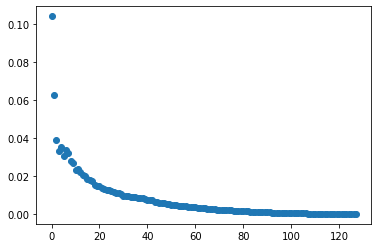

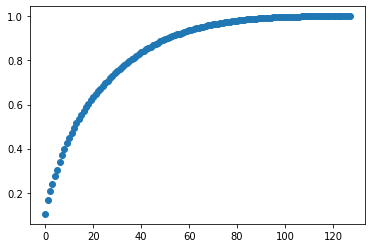

In [2057]:
import matplotlib.pyplot as plt
SVD = TruncatedSVD(n_components=128, random_state=1)  
SVD.fit(X)
cantidadList = []
for i in range(136):
  num_sv = i  
  cantidad = (100 * (1- (SVD.singular_values_[0:num_sv]).sum() / (SVD.singular_values_).sum()))
  cantidadList.append(cantidad)
roll3 = np.cumsum(SVD.explained_variance_ratio_)
plt.scatter(range(len(SVD.explained_variance_ratio_)), SVD.explained_variance_ratio_)
plt.show()
plt.scatter(range(len(roll3)), roll3)
plt.show()

In [2058]:
SVD.singular_values_.ravel()

array([18.85436345, 12.05456493, 10.07319722,  9.27934973,  8.95988034,
        8.83007545,  8.81945555,  8.58240932,  8.01193952,  7.84658041,
        7.36115248,  7.35619144,  7.09998786,  6.87249421,  6.76721627,
        6.51902415,  6.35901328,  6.28707527,  5.9079457 ,  5.84547536,
        5.77794593,  5.5658697 ,  5.52116339,  5.42698527,  5.39480801,
        5.2574587 ,  5.12234786,  5.02365378,  5.02231066,  4.89248649,
        4.70140189,  4.68438246,  4.63438747,  4.55349022,  4.52469699,
        4.4618643 ,  4.3452676 ,  4.34187458,  4.32638885,  4.24769259,
        4.1261896 ,  4.04231891,  4.02634927,  3.84124555,  3.77844237,
        3.69410306,  3.65058383,  3.64874525,  3.50456642,  3.38710024,
        3.34267731,  3.27670767,  3.20254017,  3.17842606,  3.17113124,
        3.08308895,  3.03969744,  2.87373133,  2.848623  ,  2.82600856,
        2.81710935,  2.72051244,  2.61566036,  2.58656806,  2.5697406 ,
        2.51517817,  2.51172355,  2.39543556,  2.35645366,  2.29

Cantidad de valores singulares

In [2059]:
len(SVD.singular_values_.ravel())

128

Obtenemos la cantidad de información que se tiene con 53 componentes

In [2060]:
information_quantity(53)

90.47366813817212

Mostramos las recomendaciones con n_components = 53

In [2061]:
recomendation(53,"Subway",UtMx2.columns)

,0,name
58,0.955178,Restaurant Teely
60,0.888398,Restaurant and Bar and Clothesline Carlos N Ch...
85,0.854356,Rincon del Bife
46,0.588410,Paniroles
97,0.585900,Vips
41,0.471538,Mariscos Tia Licha
86,0.433630,Sanborns Casa Piedra
45,0.432079,Mikasa
51,0.424337,Restaurant Bar Coty y Pablo
55,0.341181,Restaurant Las Mananitas


Ahora con n_components = 30

In [2062]:
recomendation(30,"Subway",UtMx2.columns)

,0,name
58,0.969712,Restaurant Teely
85,0.933236,Rincon del Bife
60,0.895270,Restaurant and Bar and Clothesline Carlos N Ch...
97,0.891727,Vips
45,0.800512,Mikasa
86,0.675261,Sanborns Casa Piedra
46,0.545977,Paniroles
51,0.518094,Restaurant Bar Coty y Pablo
41,0.510241,Mariscos Tia Licha
37,0.461867,Log Yin


Con 30 n_components, se tiene el 74% de la información original

In [2063]:
information_quantity(30)

74.10352587847179

<font color="royalblue"> **Conclusiones:** 
</font>

<font color="royalblue"> 
Al bajar de 53 componentes a 30, se obtuvo que el restaurante Log Yin fue reemplazado por el Restaurant Las Mananitas, la cantidad de información pérdida fue de aproximadamente el 16%. Conservando 9 de 10 recomendaciones con el modelo SVD.

</font>

#**Ejercicio-7.**
Repite los ejercicios 1 a 4 generando ahora la matriz de utilidad en la cual los renglones son los 
usuarios (user_ID), las columnas los nombres de los restaurantes (name) y las entradas la 
evaluación dada al servicio (service_rating). Incluye tus conclusiones. 

Ponemos las columnas de interés del dataframe rating

In [2064]:
rating_columns=["userID","service_rating","placeID"]

Hacemos lo mismo con location

In [2065]:
location_columns=["placeID","name"]

Unimos los dataframes

In [2066]:
df3=pd.merge(rating[rating_columns],location[location_columns],on="placeID")

Elimamos la U dentro de la columna userID

In [2067]:
df3["userID"] = df3["userID"].apply(lambda x:int(str(x)[1::]))
df3.head()

,userID,service_rating,placeID,name
0,1077,2,135085,Tortas Locas Hipocampo
1,1108,1,135085,Tortas Locas Hipocampo
2,1081,1,135085,Tortas Locas Hipocampo
3,1056,2,135085,Tortas Locas Hipocampo
4,1134,2,135085,Tortas Locas Hipocampo


Creamos la matriz de utilidad

In [2068]:
UtMx3 = df3.pivot_table(values='service_rating', index='userID', columns='name', fill_value=0)

Obtenemos el tamaño de la matriz

In [2069]:
UtMx3.shape

(138, 129)

Despelgamos sus primeros 10 renglones

In [2070]:
UtMx3.head(10)

name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El RincÃ³n de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
1001,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1003,0,0,2,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1005,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1006,0,0,0,1,0,0,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
1007,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1008,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1009,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2071]:
X = UtMx3.T 
X.shape

(129, 138)

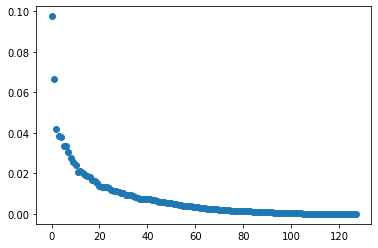

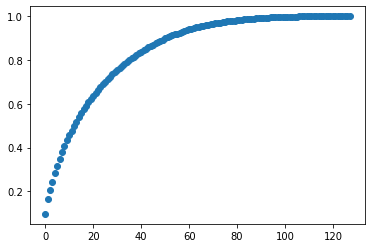

In [2072]:
import matplotlib.pyplot as plt
SVD = TruncatedSVD(n_components=128, random_state=1)  
SVD.fit(X)
cantidadList = []
for i in range(136):
  num_sv = i  
  cantidad = (100 * (1- (SVD.singular_values_[0:num_sv]).sum() / (SVD.singular_values_).sum()))
  cantidadList.append(cantidad)
roll3 = np.cumsum(SVD.explained_variance_ratio_)
plt.scatter(range(len(SVD.explained_variance_ratio_)), SVD.explained_variance_ratio_)
plt.show()
plt.scatter(range(len(roll3)), roll3)
plt.show()

In [2073]:
SVD.singular_values_.ravel()

array([1.71371617e+01, 1.15595032e+01, 9.58637075e+00, 8.77978932e+00,
       8.67789438e+00, 8.58159980e+00, 8.15554560e+00, 7.74509335e+00,
       7.40485706e+00, 7.14037674e+00, 6.89831412e+00, 6.70453486e+00,
       6.48951690e+00, 6.37022734e+00, 6.18435929e+00, 6.05196965e+00,
       5.98224178e+00, 5.82899281e+00, 5.66161154e+00, 5.47955023e+00,
       5.20189756e+00, 5.13241484e+00, 5.12425523e+00, 5.08821407e+00,
       5.04451904e+00, 4.80243176e+00, 4.73758447e+00, 4.69249103e+00,
       4.59554226e+00, 4.53933620e+00, 4.50898682e+00, 4.34752581e+00,
       4.33282882e+00, 4.25078976e+00, 4.16881641e+00, 4.08372394e+00,
       3.96552640e+00, 3.90720970e+00, 3.87407207e+00, 3.83953149e+00,
       3.78932456e+00, 3.77429036e+00, 3.73317652e+00, 3.66288511e+00,
       3.51759865e+00, 3.43018405e+00, 3.38232186e+00, 3.35743455e+00,
       3.32745203e+00, 3.23695769e+00, 3.21576611e+00, 3.07573713e+00,
       3.04912158e+00, 2.98606817e+00, 2.93376552e+00, 2.83288658e+00,
      

Cantidad de valores singulares

In [2074]:
len(SVD.singular_values_.ravel())

128

Obtenemos el porcentaje de información que se tiene con n_components = 52

In [2075]:
information_quantity(52)

90.33188523499078

Ahora obtenemos las recomendaciones con n_components = 52 (valor que contienen el 90% de la información)

In [2076]:
recomendation(52,"Subway",UtMx3.columns)

,0,name
58,0.949716,Restaurant Teely
60,0.780413,Restaurant and Bar and Clothesline Carlos N Ch...
85,0.712296,Rincon del Bife
46,0.464946,Paniroles
97,0.438833,Vips
21,0.311813,Giovannis
55,0.244420,Restaurant Las Mananitas
11,0.236541,Chilis Cuernavaca
29,0.187110,Kiku Cuernavaca
41,0.175280,Mariscos Tia Licha


Obtenemos las recomendaciones con n_components = 45

In [2082]:
recomendation(45,"Subway",UtMx3.columns)

,0,name
58,0.956227,Restaurant Teely
60,0.902251,Restaurant and Bar and Clothesline Carlos N Ch...
85,0.680841,Rincon del Bife
97,0.647332,Vips
46,0.508735,Paniroles
21,0.260939,Giovannis
11,0.232448,Chilis Cuernavaca
55,0.213019,Restaurant Las Mananitas
37,0.206317,Kiku Cuernavaca
38,0.184790,Los Vikingos


Con n_components = 45 se tiene el 86% de la información de la matriz de utilidad

In [2079]:
information_quantity(45)

86.50077316479475

<font color="royalblue"> **Conclusiones:**</font>

<font color="royalblue"> 
Con 52 n_components se tiene el 90% de la información original, en tanto que con 45 n_components se tiene el 86%, el restaurante que cambia es Mariscos Tia Licha, dado que con 45 componentes es sustituido por Los Vikingos, teniendo así que 9 de 10 recomendaciones permanecen igual (90% de las recomendaciones).

</font>

# **Ejercicio-8.**

Incluye tus conclusiones finales. En particular indica la coincidencia o no de estos tres modelos.

<font color="royalblue"> Los modelos arrojan resultados similares, debido a que los ratings son **similares** entre si. De manera parecida a PCA, SVD es útil para representar un modelo con una menor cantidad de información, por ejemplo con 50 componentes de SVD, fue posible representar el 90% de la información, en lugar de los 138 componentes originales del dataset de ratings, por citar un ejemplo.  Se encontraron algunos valores críticos de los componentes, debido a que si los englobamos en rangos, al momento de revisar fuera de los límites de estos, tenemos cambios significativos en las recomendaciones, es decir, cambios del 30 al 40 por ciento. Las recomendaciones hechas a **Tacos de barbacoa enfrente del Tec** cambian respecto a **Subway**, lo cual se puede atribuir a factores como el servicio, la calidad de la comida y la opinión del restaurante. </font>

###**Fin de la Actividad de la semana 10 - Sistemas de Recomendación y Reducción de Dimensionalidad con SVD.**